In [136]:
from importlib import reload
from pyfvtool import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root
from tqdm import tqdm

import sys
sys.path.append('..')
from pymadreq import *
import pymadreq.coreflood as cf
import pymadreq.fractional_flow as ff
import pymadreq.IO as IO

reload(ff)
reload(cf)
reload(IO)

<module 'pymadreq.IO' from 'd:\\projects\\github\\PyMADREQ\\examples\\..\\pymadreq\\IO.py'>

## Reading input file and defining the domain

In [137]:
# read the input file
data = IO.read_json("../examples/sample.json")
rel_perm_ww, rel_perm_ow, pc_ww, pc_ow = IO.read_transport_functions(data)
core_plug = IO.read_core_properties(data)
fluids = IO.read_fluids(data)
IC = IO.read_initial_conditions(data) # initial conditions
BC = IO.createFloodingCondition(data["BC"]) # boundary conditions
numerical_params = IO.read_numerical_settings(data)
m = IO.read_flooding_domain(data)

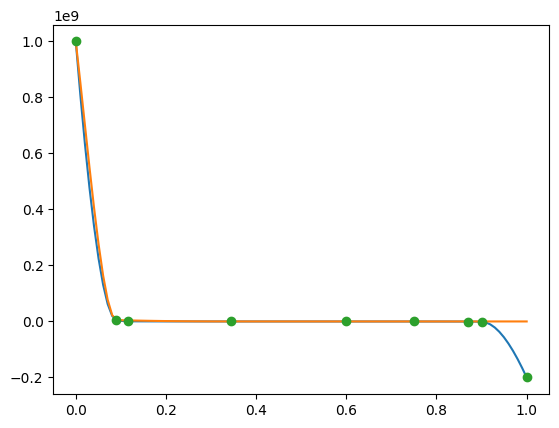

In [138]:
pc_ww.visualize()

In [139]:
cf_1d = cf.CoreFlooding1D(
    rel_perm_ww, pc_ww, core_plug, fluids, IC, BC, numerical_params, Nx=50
)

In [140]:
t_num, R_num, dp_num = cf_1d.simulate_no_pc()
t_num_pc, R_num_pc, dp_num_pc = cf_1d.simulate_with_pc()


## Transport properties

In [141]:
xt_shock, sw_shock, xt_prf, sw_prf, t_ana, p_inj_ana, R_oil_ana = ff.frac_flow_wf(
    fluids, rel_perm_ww, core_plug, IC, ut=cf_1d.u_inj, sw_inj=1.0, pv_inj=3.0)

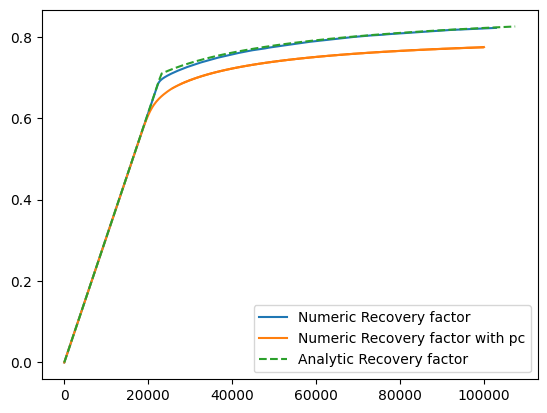

In [142]:
plt.plot(t_num, R_num, label= 'Numeric Recovery factor')
plt.plot(t_num_pc, R_num_pc, label= 'Numeric Recovery factor with pc')
plt.plot(t_ana, R_oil_ana, '--', label= 'Analytic Recovery factor')
plt.legend()

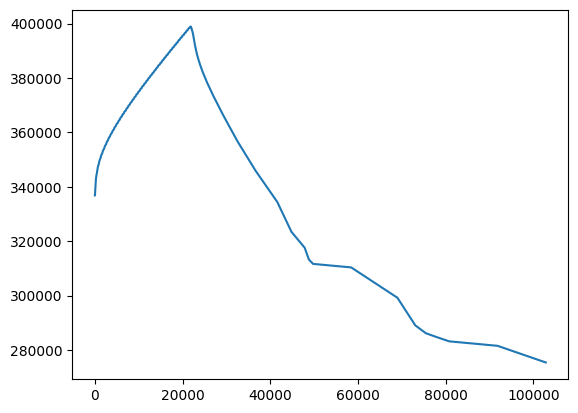

In [143]:
plt.plot(t_num, dp_num, label= 'Numeric Pressure drop')

In [144]:
cf_1d.final_sw.value


array([1.15306631, 0.84693369, 0.84522552, 0.84355542, 0.84191895,
       0.84031226, 0.83873197, 0.83717505, 0.83563877, 0.83412061,
       0.83261819, 0.83112925, 0.82965158, 0.82818302, 0.82672136,
       0.82526434, 0.82380962, 0.82235471, 0.82089691, 0.8194333 ,
       0.81796067, 0.81647542, 0.81497351, 0.81345037, 0.81190078,
       0.81031872, 0.80869725, 0.80702828, 0.80530234, 0.80350824,
       0.80163276, 0.79966006, 0.79757109, 0.79534267, 0.79294642,
       0.79034711, 0.78750055, 0.78435062, 0.78082514, 0.77683038,
       0.7722443 , 0.76691033, 0.76063938, 0.75324211, 0.74456054,
       0.73410172, 0.72111949, 0.70427394, 0.68190768, 0.64778449,
       0.62134106, 0.57865894])

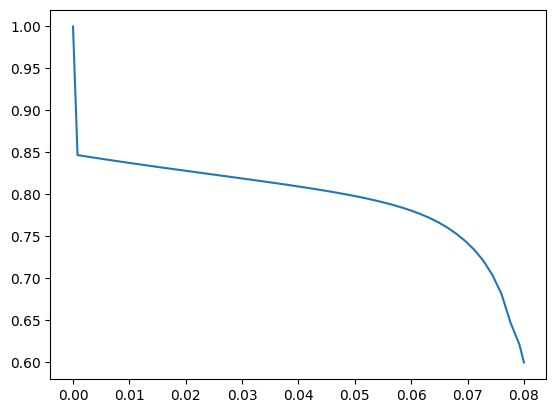

In [145]:
visualizeCells(cf_1d.final_sw)

## Fittin model to core flooding data

In [146]:
# using lmfit to fit a two-phase model to a dataset
# from lmfit import minimize, Parameters
# def residual(params, x, data):
#     amp = params['amp']
#     phaseshift = params['phase']
#     freq = params['frequency']
#     decay = params['decay']

#     model = amp * np.sin(x*freq + phaseshift) * np.exp(-x*x*decay)

#     return (data-model)


# params = Parameters()
# params.add('amp', value=10)
# params.add('decay', value=0.007)
# params.add('phase', value=0.2)
# params.add('frequency', value=3.0)

# out = minimize(residual, params, args=(x, data))

In [147]:
cf2d = cf.CoreFlooding2D(
    rel_perm_ww, pc_ww, core_plug, fluids, IC, BC, numerical_params, Nx=20, Nr = 5
)

In [148]:
t, r, dp = cf2d.simulate_no_pc()
t_pc, r_pc, dp_pc = cf2d.simulate_with_pc()

c:\Users\aliak\venvs\myfvm\Lib\site-packages\pyfvtool\cell.py:97: RuntimeWarning: invalid value encountered in divide
  return CellVariable(self.domain, self.value/other.value)
d:\projects\github\PyMADREQ\examples\..\pymadreq\coreflood.py:979: RuntimeWarning: invalid value encountered in divide
  sw_old, dt, RHS_sw / self.porosity.value.ravel(), self.saturation_bc
d:\projects\github\PyMADREQ\examples\..\pymadreq\coreflood.py:1069: RuntimeWarning: invalid value encountered in divide
  sw_old, dt, RHS_sw / self.porosity.value.ravel(), self.saturation_bc


In [149]:
cf2d.porosity.value

array([[0.  , 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.  ],
       [0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38],
       [0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38],
       [0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38],
       [0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38],
       [0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38],
       [0.  , 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38,
        0.38, 0.38, 0.38, 0.38, 

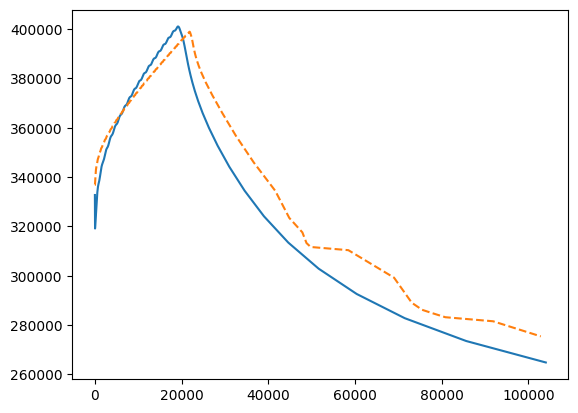

In [150]:
plt.plot(t, dp, t_num, dp_num, '--')

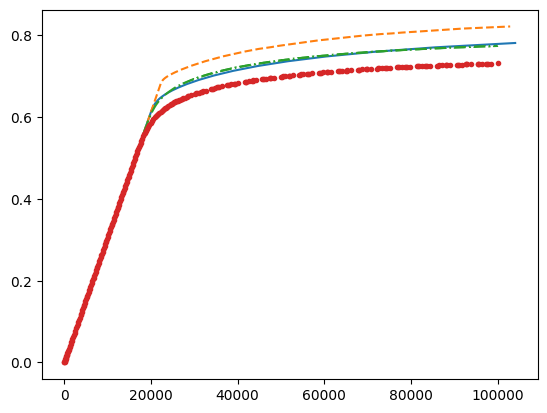

In [151]:
plt.plot(t, r, t_num, R_num, '--', t_num_pc, R_num_pc, '-.', t_pc, r_pc, '.')